In [3]:
# Example Feature Extraction from XML Files
# We count the number of specific system calls made by the programs, and use
# these as our features.

# This code requires that the unzipped training set is in a folder called "train". 

import os
from collections import Counter
try:
    import xml.etree.cElementTree as ET
except ImportError:
    import xml.etree.ElementTree as ET
import numpy as np
from scipy import sparse

import util

TRAIN_DIR = "train"

call_set = set([])

def add_to_set(tree):
    for el in tree.iter():
        call = el.tag
        call_set.add(call)

def create_data_matrix(start_index, end_index, direc="train"):
    X = None
    classes = []
    ids = [] 
    i = -1
    for datafile in os.listdir(direc):
        if datafile == '.DS_Store':
            continue

        i += 1
        if i < start_index:
            continue 
        if i >= end_index:
            break

        # extract id and true class (if available) from filename
        id_str, clazz = datafile.split('.')[:2]
        ids.append(id_str)
        # add target class if this is training data
        try:
            classes.append(util.malware_classes.index(clazz))

        except ValueError:
            # we should only fail to find the label in our list of malware classes
            # if this is test data, which always has an "X" label
            assert clazz == "X"
            classes.append(-1)

        # parse file as an xml document
        tree = ET.parse(os.path.join(direc,datafile))
        if direc=="train":
            add_to_set(tree)
        this_row = call_feats(tree)
        if X is None:
            X = this_row 
        else:
            X = np.vstack((X, this_row))

    return X, np.array(classes), ids

def call_feats(tree):
    good_calls = ['sleep', 'dump_line']

    call_counter = {}
    for el in tree.iter():
        call = el.tag
        if call not in call_counter:
            call_counter[call] = 1
        else:
            call_counter[call] += 1

    call_feat_array = np.zeros(len(good_calls))
    for i in range(len(good_calls)):
        call = good_calls[i]
        call_feat_array[i] = 0
        if call in call_counter:
            call_feat_array[i] = call_counter[call]

    return call_counter

# Feature extraction
def main():
    X_train, t_train, train_ids = create_data_matrix(0, 5, TRAIN_DIR)
    X_valid, t_valid, valid_ids = create_data_matrix(10, 15, TRAIN_DIR)

    print 'Data matrix (training set):'
    print X_train
    print 'Classes (training set):'
    print t_train

    # From here, you can train models (eg by importing sklearn and inputting X_train, t_train).

if __name__ == "__main__":
    main()
    

ImportError: No module named util

In [4]:
X_train, t_train, train_ids = create_data_matrix(0, 3086, TRAIN_DIR)

NameError: name 'create_data_matrix' is not defined

In [5]:
X_test, t_test, test_ids = create_data_matrix(0, 3728, 'test')

NameError: name 'create_data_matrix' is not defined

In [6]:
def convertMatrix(X, call_set):
    features = dict()
    for i in call_set:
        features[i] = []
    
    for i in X:
        for j in call_set:
            if j in i[0].keys():
                features[j].append(i[0][j])
            else:
                features[j].append(0)
    
    return features

In [7]:
import pandas as pd

In [8]:
train_set = pd.DataFrame(convertMatrix(X_train,call_set))
test_set= pd.DataFrame(convertMatrix(X_test,call_set))
# train_set['id'] = train_ids
# train_set['class'] = t_train

NameError: name 'X_train' is not defined

In [9]:
train_set

NameError: name 'train_set' is not defined

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM","Poly SVM","Sigmoid SVM","RBF SVM", "Decision Tree",
         "Random Forest",  "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis"]
classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", C=0.025),
    SVC(kernel="sigmoid", C=0.025),
    SVC(kernel="rbf",C=0.025),
    #SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1),
    #AdaBoostClassifier(),
    #GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [23]:
y_train = t_train[:2000]
X_train = train_set[:2000]
y_valid = t_train[2000:]
X_valid = train_set[2000:]
y_test = t_test
X_test = test_set

In [24]:
for name, clf in zip(names, classifiers):
#         ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_valid, y_valid)
        print name, score


Nearest Neighbors 0.837937384899
Linear SVM 0.85635359116
Poly SVM 0.82320441989
Sigmoid SVM 0.515653775322
RBF SVM 0.622467771639
Decision Tree 0.862799263352
Random Forest

/Users/Jing/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/Jing/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


 0.8802946593
Linear Discriminant Analysis 0.830570902394
Quadratic Discriminant Analysis 0.791896869245


/Users/Jing/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [27]:
clf=RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1)
clf.fit(train_set, t_train)
t_test=clf.predict(X_test)

In [28]:
t_test

array([ 8, 10,  8, ..., 12,  8,  8])

In [29]:
# these are the fifteen malware classes we're looking for
malware_classes = ["Agent", "AutoRun", "FraudLoad", "FraudPack", "Hupigon", "Krap",
           "Lipler", "Magania", "None", "Poison", "Swizzor", "Tdss",
           "VB", "Virut", "Zbot"]

# a function for writing predictions in the required format
def write_predictions(predictions, ids, outfile):
    """
    assumes len(predictions) == len(ids), and that predictions[i] is the
    index of the predicted class with the malware_classes list above for 
    the executable corresponding to ids[i].
    outfile will be overwritten
    """
    with open(outfile,"w+") as f:
        # write header
        f.write("Id,Prediction\n")
        for i, history_id in enumerate(ids):
            f.write("%s,%d\n" % (history_id, predictions[i]))

In [35]:
write_predictions(t_test,test_ids,"randomforrest.csv")

# Exploration

In [93]:
%matplotlib inline

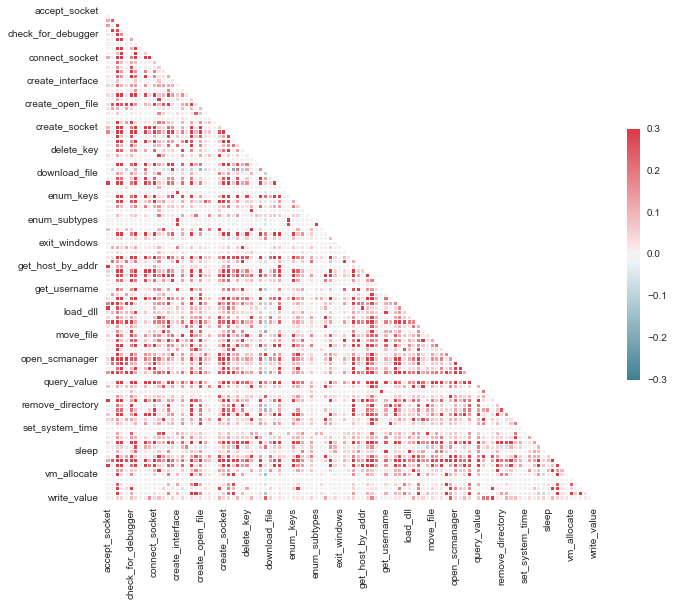

In [94]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="white")

# Generate a large random dataset

# Compute the correlation matrix
corr = train_set.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [66]:
plt.show()

In [80]:
from sklearn.decomposition import PCA

pca=PCA(n_components=20)
pca.fit_transform(train_set,t_train)
pca.explained_variance_ratio_

array([  3.91315276e-01,   2.63259786e-01,   1.45155855e-01,
         9.41070436e-02,   4.22026597e-02,   1.50369668e-02,
         1.35901802e-02,   1.08299298e-02,   9.02474844e-03,
         4.79322777e-03,   3.51131656e-03,   1.46616478e-03,
         1.30781114e-03,   1.09285478e-03,   8.78713852e-04,
         4.77860237e-04,   4.44813602e-04,   3.01532820e-04,
         2.17952089e-04,   1.66558047e-04])

In [81]:
pca_train=pca.fit_transform(train_set,t_train)
pca_test=pca.transform(test_set)

# Systemized Model Selection

In [38]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(train_set.shape[0]), train_size=0.7)
mask=np.ones(train_set.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [39]:
from sklearn.grid_search import GridSearchCV

"""
Function
--------
cv_optimize

Inputs
------
clf : an instance of a scikit-learn classifier
parameters: a parameter grid dictionary thats passed to GridSearchCV (see above)
X: a samples-features matrix in the scikit-learn style
y: the response vectors of 1s and 0s (+ives and -ives)
n_folds: the number of cross-validation folds (default 5)
score_func: a score function we might want to pass (default python None)
   
Returns
-------
The best estimator from the GridSearchCV, after the GridSearchCV has been used to
fit the model.
     
Notes
-----
see do_classify and the code below for an example of how this is used
"""
#your code here

def cv_optimize(clf,parameters,X,y,n_folds,score_func=None):
    if score_func:
        fitmodel = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        fitmodel = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    fitmodel.fit(X,y)
    print "BEST", fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_
    best = fitmodel.best_estimator_
    return best

In [40]:
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, train, test, mask=None, reuse_split=None, score_func=None, n_folds=5):
    
    X=train
    y=test
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [44]:
%%time
clfrf, Xtrain, ytrain, Xtest, ytest = do_classify(RandomForestClassifier(),
                                                   {"max_depth": [10,20,50,100,200,500]}, 
                                                   train_set,t_train,mask=mask)

using mask
BEST {'max_depth': 20} 0.87962962963 [mean: 0.87824, std: 0.01412, params: {'max_depth': 10}, mean: 0.87963, std: 0.01408, params: {'max_depth': 20}, mean: 0.87639, std: 0.01220, params: {'max_depth': 50}, mean: 0.87731, std: 0.01344, params: {'max_depth': 100}, mean: 0.87917, std: 0.01041, params: {'max_depth': 200}, mean: 0.86713, std: 0.00984, params: {'max_depth': 500}]
############# based on standard predict ################
Accuracy on training data: 0.99
Accuracy on test data:     0.88
[[ 14   0   0   0   4   0   1   0  11   3   0   1   2   0   0]
 [  0   8   0   0   0   0   0   0   3   1   0   0   1   0   0]
 [  4   0   6   0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   9   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   7   0   0   0   5   0   0   0   0   0   0]
 [  0   1   1   0   0   9   0   0   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0  14   0   1   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   9   0   0   0   0 

/Users/Jing/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [45]:
t_test=clfrf.predict(X_test)
write_predictions(t_test,test_ids,"randomforrest2.csv")

In [60]:
reuse_split=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)

In [61]:
%%time
clfrf, Xtrain, ytrain, Xtest, ytest = do_classify(RandomForestClassifier(),
                                                   {"max_depth": [10,20,50],
                                                    "n_estimators":[1,5,10,20,50]}, 
                                                   train_set,t_train,reuse_split=reuse_split)

using reuse split
BEST {'n_estimators': 20, 'max_depth': 10} 0.888425925926 [mean: 0.84259, std: 0.01593, params: {'n_estimators': 1, 'max_depth': 10}, mean: 0.86852, std: 0.01399, params: {'n_estimators': 5, 'max_depth': 10}, mean: 0.87917, std: 0.00593, params: {'n_estimators': 10, 'max_depth': 10}, mean: 0.88843, std: 0.00610, params: {'n_estimators': 20, 'max_depth': 10}, mean: 0.83565, std: 0.01996, params: {'n_estimators': 1, 'max_depth': 20}, mean: 0.87083, std: 0.00479, params: {'n_estimators': 5, 'max_depth': 20}, mean: 0.86991, std: 0.01078, params: {'n_estimators': 10, 'max_depth': 20}, mean: 0.87593, std: 0.01110, params: {'n_estimators': 20, 'max_depth': 20}, mean: 0.83889, std: 0.01230, params: {'n_estimators': 1, 'max_depth': 50}, mean: 0.87037, std: 0.01257, params: {'n_estimators': 5, 'max_depth': 50}, mean: 0.87639, std: 0.00668, params: {'n_estimators': 10, 'max_depth': 50}, mean: 0.88472, std: 0.01312, params: {'n_estimators': 20, 'max_depth': 50}]
############# bas

In [68]:
%%time
from sklearn.linear_model import LogisticRegression 

clflr, Xtrain, ytrain, Xtest, ytest = do_classify(LogisticRegression(penalty="l1"), \
                                                   {"C": [0.001, 0.01, 0.1, 1.0, 10.0]},
                                                   train_set,t_train,reuse_split=reuse_split)

using reuse split
BEST {'C': 1.0} 0.861111111111 [mean: 0.73380, std: 0.01048, params: {'C': 0.001}, mean: 0.76019, std: 0.00315, params: {'C': 0.01}, mean: 0.84861, std: 0.00490, params: {'C': 0.1}, mean: 0.86111, std: 0.00837, params: {'C': 1.0}, mean: 0.85370, std: 0.01001, params: {'C': 10.0}, mean: 0.85880, std: 0.01335, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.92
Accuracy on test data:     0.87
[[  9   1   0   0   2   3   0   0  16   1   0   0   2   1   1]
 [  0   7   0   0   0   1   0   0   3   1   0   0   1   0   0]
 [  1   0   8   0   0   1   0   0   1   0   0   0   0   0   0]
 [  0   0   0   6   0   0   0   0   3   0   0   0   0   0   0]
 [  0   0   1   0   7   0   0   0   4   0   0   0   0   0   0]
 [  2   0   1   2   0   7   0   0   2   0   0   0   0   0   0]
 [  1   0   0   0   0   0  13   0   1   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   6   3   0   0   0   0   0   0]
 [  2   1   2   1   1   1

In [71]:
t_test=clflr.predict(X_test)
write_predictions(t_test,test_ids,"logistic.csv")

In [ ]:
%%time
# from sklearn.neural_network import MLPClassifier

# clfnn, Xtrain, ytrain, Xtest, ytest = do_classify(MLPClassifier(algorithm="sgd",activation="logistic",
#                                                                random_state=1),
#                                                    {"alpha": [1e-5,1e-4,1e-3,1e-2,1],
#                                                     "n_estimators":[1,5,10]}, 
#                                                    train_set,t_train,reuse_split=reuse_split)

# PCA transformation

In [86]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(pca_train.shape[0]), train_size=0.7)
mask=np.ones(pca_train.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [91]:
%%time
clfrf, Xtrain, ytrain, Xtest, ytest = do_classify(RandomForestClassifier(),
                                                   {"max_depth": [10,20,50],"n_estimators":[10,20,50]}, 
                                                   pca_train,t_train,mask=mask)

using mask
BEST {'n_estimators': 50, 'max_depth': 10} 0.872685185185 [mean: 0.85694, std: 0.01766, params: {'n_estimators': 10, 'max_depth': 10}, mean: 0.87130, std: 0.01766, params: {'n_estimators': 20, 'max_depth': 10}, mean: 0.87269, std: 0.01116, params: {'n_estimators': 50, 'max_depth': 10}, mean: 0.86667, std: 0.00862, params: {'n_estimators': 10, 'max_depth': 20}, mean: 0.87130, std: 0.01674, params: {'n_estimators': 20, 'max_depth': 20}, mean: 0.86991, std: 0.01173, params: {'n_estimators': 50, 'max_depth': 20}, mean: 0.85741, std: 0.01856, params: {'n_estimators': 10, 'max_depth': 50}, mean: 0.86852, std: 0.01319, params: {'n_estimators': 20, 'max_depth': 50}, mean: 0.87176, std: 0.01922, params: {'n_estimators': 50, 'max_depth': 50}]
############# based on standard predict ################
Accuracy on training data: 0.96
Accuracy on test data:     0.88
[[  7   0   0   0   0   0   0   0  18   1   0   0   2   0   2]
 [  0   5   0   0   0   0   0   0   6   0   0   0   1   0   1]

/Users/Jing/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [92]:
%%time
from sklearn.linear_model import LogisticRegression 

clflr, Xtrain, ytrain, Xtest, ytest = do_classify(LogisticRegression(penalty="l1"), \
                                                   {"C": [0.001, 0.01, 0.1, 1.0, 10.0]},
                                                   pca_train,t_train,reuse_split=reuse_split)

using reuse split
BEST {'C': 1.0} 0.859259259259 [mean: 0.73380, std: 0.01048, params: {'C': 0.001}, mean: 0.76019, std: 0.00315, params: {'C': 0.01}, mean: 0.84954, std: 0.00611, params: {'C': 0.1}, mean: 0.85926, std: 0.00848, params: {'C': 1.0}, mean: 0.85417, std: 0.01015, params: {'C': 10.0}]
############# based on standard predict ################
Accuracy on training data: 0.92
Accuracy on test data:     0.87
[[  9   1   0   0   2   3   0   0  16   1   0   0   2   1   1]
 [  0   7   0   0   0   0   0   0   4   1   0   0   1   0   0]
 [  0   0   8   0   0   1   0   0   2   0   0   0   0   0   0]
 [  0   0   0   6   0   0   0   0   3   0   0   0   0   0   0]
 [  0   0   1   0   7   0   0   0   4   0   0   0   0   0   0]
 [  3   0   0   2   0   7   0   0   2   0   0   0   0   0   0]
 [  1   0   0   0   0   0  13   0   1   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   6   3   0   0   0   0   0   0]
 [  3   1   1   1   0   1   2   0 469   1   0   5   3   2   0]
 [  0   1   0

In [ ]:
import GaussianGenerativeModel

nb1 = GaussianGenerativeModel(isSharedCovariance=False)
nb1.fit(X,Y)
nb1.predit()

nb2 = GaussianGenerativeModel(isSharedCovariance=True)
nb2.fit(X,Y)
nb2.visualize("generative_result_shared_covariances.png")
